In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
gdp_df = pd.read_csv("../../data/UNdata_Export_GDP.csv", skipfooter=3, engine='python')




In [134]:
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df)


          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


In [135]:
gdp_df.shape

(6868, 3)

In [136]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [137]:
gdp_df["Year"].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [138]:
gdp_df['Country'].value_counts()

Zimbabwe                     30
Burundi                      30
Chile                        30
Niger                        30
Luxembourg                   30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [139]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [140]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

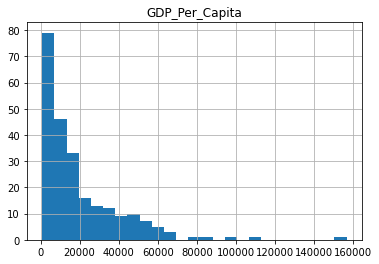

In [141]:
gdp_2014.hist(column="GDP_Per_Capita", bins=25)

In [142]:
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
113,Antigua and Barbuda,2014,18104.241470
143,Arab World,2014,14219.562395
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
5,Afghanistan,2014,2102.385234


In [143]:
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=True)

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
83,Angola,2014,8239.828837
53,Algeria,2014,11512.705405
23,Albania,2014,11623.866679
143,Arab World,2014,14219.562395
113,Antigua and Barbuda,2014,18104.241470


In [159]:
gdp_pivoted = gdp_df[gdp_df["Year"].isin([1990, 2017])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Country", 
                                                                columns="Year")
gdp_pivoted = gdp_pivoted.dropna()                                                   
print(gdp_pivoted)

Year                         1990          2017
Country                                        
Albania               4842.734635  12811.759436
Algeria               8746.352901  11737.409353
Angola                5783.429064   7310.901738
Antigua and Barbuda  15459.551675  19840.076123
Arab World            9694.667544  14555.474921
...                           ...           ...
Vanuatu               2888.309393   3116.645194
Vietnam               1673.249634   7155.745829
World                 9680.269697  16253.385518
Zambia                2190.182814   3485.005238
Zimbabwe              3324.348171   3028.245976

[207 rows x 2 columns]


In [164]:
gdp_pivoted["Percent_Change"] = (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990] * 100
print(gdp_pivoted)

Year                         1990          2017  Percent_Change
Country                                                        
Albania               4842.734635  12811.759436      164.556297
Algeria               8746.352901  11737.409353       34.197756
Angola                5783.429064   7310.901738       26.411194
Antigua and Barbuda  15459.551675  19840.076123       28.335391
Arab World            9694.667544  14555.474921       50.138980
...                           ...           ...             ...
Vanuatu               2888.309393   3116.645194        7.905517
Vietnam               1673.249634   7155.745829      327.655604
World                 9680.269697  16253.385518       67.902197
Zambia                2190.182814   3485.005238       59.119377
Zimbabwe              3324.348171   3028.245976       -8.907075

[207 rows x 3 columns]


In [165]:
gdp_pivoted.sort_values("Percent_Change", ascending=True)

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
...,...,...,...
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
Myanmar,619.645144,4739.910118,664.939443


In [171]:
sum(gdp_pivoted["Percent_Change"]<0)


17

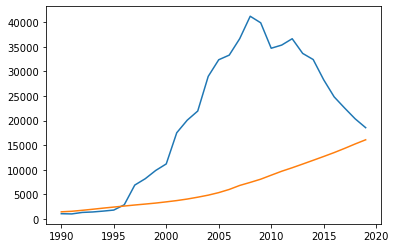

In [187]:
gdp_eguinea = gdp_df[gdp_df["Country"].isin(["Equatorial Guinea"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")
gdp_china = gdp_df[gdp_df["Country"].isin(["China"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")

plt.plot(gdp_eguinea)
plt.plot(gdp_china)
plt.show()